In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.1f}'.format # e 표시 제거?
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
pd.options.display.max_info_columns =200
pd.options.display.float_format = '{:,}'.format
print('1')

1


In [35]:
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

In [36]:
#df = pd.read_excel('Z:\2022 이어드림 프로젝트\2022-05-09\파이널프로젝트_RAW_210329_210926.xlsx')

df = pd.read_excel('데이터분석프로젝트_VER2_210329_210926.xlsx')
df.shape

(105419, 18)

In [4]:
df.head()
# id : 각 거래내역에 대한 ID
# customer_id : 고객 ID
# course_id : 강의 고유값
# type : 결제 유무 - order / payment / 
# state : 결제 상태
# course_title : 강의 제목
# category_title : 강의 분류
# format : 올인원/스쿨온라인 _ 난이도 설정?
# completed_at : 처리 날짜
# transaction_amount : 결제 금액
# coupon_title : 쿠폰 이름
# coupon_discount_amount : 할인 비율
# sale_price : 할인 금액
# tax_free_amount : 면세

# pg : PG(Payment Gateway)라고 해서 실제로 온라인 거래할 때 사용하는 금융거래 대행사를 의미합니다. 
#(e.g. 카카오페이, 토스페이먼트, U+ pay 등..) 비어있는 것은 default PG사를 의미합니다. 
#(LG U+ 같은 언급이 안되어있는 다른 회사중에 하나)

# method : 결제 방식 VBANK : 가상계좌?
# subcategory_title : 서브 분류
# marketing_start_at : 마케팅 시작 날짜 (강의를 판매한 시점)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,"504,760.0","201,435.0",ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,"110,500.0","110,500.0",NaN,VBANK,개발자 커리어,NaT
1,970650,"432,862.0","203,178.0",ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,"116,000.0","116,000.0",NaN,CARD,영상 편집,2020-12-02
2,970657,"72,297.0","204,246.0",PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,"19,090.0","190,900.0","190,900.0",NaN,CARD,NaN,2021-03-04
3,970656,"72,297.0","204,246.0",ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,"190,900.0","190,900.0",NaN,CARD,NaN,2021-03-04
4,970658,"478,028.0","201,797.0",PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","117,500.0","117,500.0",NaN,CARD,PPT/보고서,2019-11-14


In [5]:
df.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,"105,419.0","105,416.0","100,212.0","105,419.0","31,817.0","104,291.0","104,291.0"
mean,"1,147,053.9457403314","417,248.2527415193","203,868.58632698678","146,481.42085392575","49,721.71857811861","161,080.79428713888","157,555.05860524878"
std,"112,589.75212552754","206,414.49664778754","1,534.5833308632493","719,506.1146565223","56,244.666493276876","395,529.75197120407","389,813.3309701259"
min,"567,993.0",16.0,"2,516.0","-4,144,074.0",0.0,1.0,0.0
25%,"1,048,940.5","256,401.0","203,100.0","83,500.0","20,000.0","109,000.0","109,000.0"
50%,"1,135,186.0","501,046.0","203,787.0","117,500.0","21,000.0","132,000.0","132,000.0"
75%,"1,240,472.5","566,595.0","204,775.0","159,000.0","69,150.0","171,000.0","171,000.0"
max,"1,381,657.0","672,308.0","207,742.0","113,400,000.0","2,000,000.0","90,940,000.0","90,940,000.0"


In [6]:
df.head(3)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,"504,760.0","201,435.0",ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,"110,500.0","110,500.0",NaN,VBANK,개발자 커리어,NaT
1,970650,"432,862.0","203,178.0",ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,"116,000.0","116,000.0",NaN,CARD,영상 편집,2020-12-02
2,970657,"72,297.0","204,246.0",PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,"19,090.0","190,900.0","190,900.0",NaN,CARD,NaN,2021-03-04


In [7]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [8]:
df.isna().sum()/len(df)*100

id                                         0.0
customer_id              0.0028457868126239103
course_id                      4.9393373111109
type                                       0.0
state                                      0.0
course_title              0.015177529667327522
category_title            0.022766294500991283
format                    0.015177529667327522
completed_at                               0.0
transaction_amount                         0.0
coupon_title                 69.81853366091502
coupon_discount_amount       69.81853366091502
sale_price                  1.0700158415465904
tax_free_amount             1.0700158415465904
pg                          14.300078733435148
method                      12.422808032707575
subcategory_title            18.80970223583984
marketing_start_at          17.054800368055094
dtype: float64

In [9]:
df.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [10]:
df.corr()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
id,1.0,0.20148986624486537,0.36050089628214527,0.026397988810310708,0.06928407310024787,0.04489146660443849,0.03630859925981633
customer_id,0.20148986624486537,1.0,0.02388895459457367,0.01866973736977547,-0.34477195777606184,-0.0012446991857904888,-0.0021238892964060853
course_id,0.36050089628214527,0.02388895459457367,1.0,0.045096164473890234,0.01516159239982583,0.04255148639112498,0.04216976197112998
transaction_amount,0.026397988810310708,0.01866973736977547,0.045096164473890234,1.0,-0.34296014360395244,0.9549428194506073,0.9470167041496034
coupon_discount_amount,0.06928407310024787,-0.34477195777606184,0.01516159239982583,-0.34296014360395244,1.0,0.25169230722424957,0.24499705669944064
sale_price,0.04489146660443849,-0.0012446991857904888,0.04255148639112498,0.9549428194506073,0.25169230722424957,1.0,0.9882546757548379
tax_free_amount,0.03630859925981633,-0.0021238892964060853,0.04216976197112998,0.9470167041496034,0.24499705669944064,0.9882546757548379,1.0


In [10]:
df.columns

# id : 각 거래내역에 대한 ID
# customer_id : 고객 ID
# course_id : 강의 고유값
# type : 결제 유무 - order / payment / 
# state : 결제 상태
# course_title : 강의 제목
# category_title : 강의 분류
# format : 올인원/스쿨온라인 _ 난이도 설정?
# completed_at : 처리 날짜
# transaction_amount : 결제 금액
# coupon_title : 쿠폰 이름
# coupon_discount_amount : 할인 비율
# sale_price : 할인 금액
# tax_free_amount : 면세

# pg : PG(Payment Gateway)라고 해서 실제로 온라인 거래할 때 사용하는 금융거래 대행사를 의미합니다. 
#(e.g. 카카오페이, 토스페이먼트, U+ pay 등..) 비어있는 것은 default PG사를 의미합니다. - TOSS payment?
#(LG U+ 같은 언급이 안되어있는 다른 회사중에 하나)

# method : 결제 방식 VBANK : 가상계좌?
# subcategory_title : 서브 분류
# marketing_start_at : 마케팅 시작 날짜 (강의를 판매한 시점)

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price',
       'tax_free_amount', 'pg', 'method', 'subcategory_title',
       'marketing_start_at'],
      dtype='object')

In [53]:
df2['format'].value_counts()

#tax_free_amount 컬럼 보안 이슈로 삭제, 
#type 컬럼의 ORDER, TRANSACTION 속성, 
#state컬럼의 PEDNING, CANCELLED, HIDDEN, DELETE 속성은 보안 이슈로 삭제

올인원        86781
RED         6202
온라인 완주반     3788
하루10분컷      2969
스쿨 온라인      1055
스쿨          1036
B2B          762
B2B 온라인      613
B2G          591
이벤트          193
아카이브          72
MBA           56
캠프            46
관리             2
콜로소            2
Name: format, dtype: int64

In [11]:
df['method'].unique()

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', nan, 'POINT', 'VOUCHER'], dtype=object)

In [12]:
df['method'].nunique()

9

In [13]:
df[df['method'].isna()]['pg'].unique()

array(['KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [39]:
df['method'].value_counts()

CARD            66380
VBANK            8540
POINT            8084
PROMOTION        4733
TRANS            2732
TRANSFER         1247
ONSITE            599
VOUCHER             5
B2B_CONTRACT        3
Name: method, dtype: int64

In [ ]:
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
labels – Single label or list-like. It’s used with axis param.
axis – Default set’s to 0. 1 to drop columns and 0 to drop rows.
index – Use to specify rows. Accepts single label or list-like.
columns – Use to specify columns. Accepts single label or list-like.
level – int or level name, optional, use for Multiindex.
inplace – Default False, returns a copy of DataFrame. When used True, it drop’s column inplace (current DataFrame) and returns None.
errors – {‘ignore’, ‘raise’}, default ‘raise’



In [55]:
# 수정 필요 ***********
#TYPE가 ORDER인 행 제거
#TYPE가 TRANSACTION인 행 제거
#STATE가 PENDING인 행 제거
#STATE가 CANCELLED인 행 제거
#STATE가 DELETED인 행 제거

cond = df[df['type']=='ORDER'].index
df2 = df.drop(cond)

cond2 = df[df['type']=='TRANSACTION'].index
df2 = df.drop(cond2)

cond3 = df[df['state']=='PENDING'].index
df2 = df.drop(cond3)

cond4 = df[df['state']=='CANCELLED'].index
df2 = df.drop(cond4)

cond5 = df[df['state']=='DELETED'].index
df2 = df.drop(cond5)

df2['format'].value_counts()

올인원        87241
RED         6242
온라인 완주반     3813
하루10분컷      2976
B2B 온라인     1058
스쿨 온라인      1057
스쿨          1036
B2B          807
B2G          592
이벤트          193
아카이브          72
MBA           56
캠프            48
관리             2
콜로소            2
온라인            1
Name: format, dtype: int64

In [59]:
#TYPE가 ORDER인 행 제거 * 복습 필요
#TYPE가 TRANSACTION인 행 제거
#STATE가 PENDING인 행 제거
#STATE가 CANCELLED인 행 제거
#STATE가 DELETED인 행 제거
df2 = df

cond = df[df['type'].str.contains('ORDER')].index
df2.drop(cond, inplace=True)

cond = df[df['type'].str.contains('TRANSACTION')].index
df2.drop(cond, inplace=True)

cond = df[df['state'].str.contains('PENDING')].index
df2.drop(cond, inplace=True)

cond = df[df['state'].str.contains('CANCELLED')].index
df2.drop(cond, inplace=True)

cond = df[df['state'].str.contains('HIDDEN')].index
df2.drop(cond, inplace=True)

cond = df[df['state'].str.contains('DELETED')].index
df2.drop(cond, inplace=True)



df2['format'].value_counts()

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
Name: format, dtype: int64

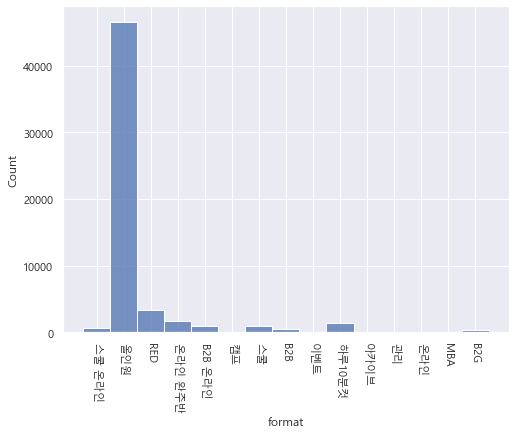

In [60]:
plt.figure(figsize=(8, 6)) # 올인원
sns.histplot(df2, x='format')
plt.xticks(rotation=-90, )
plt.show()

In [61]:
df2['format'].unique()

array(['스쿨 온라인', '올인원', 'RED', '온라인 완주반', 'B2B 온라인', '캠프', '스쿨', 'B2B',
       '이벤트', '하루10분컷', '아카이브', '관리', '온라인', nan, 'MBA', 'B2G'],
      dtype=object)

In [66]:
df2['course_id'].duplicated()

2         False
4         False
8         False
10        False
14        False
          ...  
105411     True
105412     True
105413     True
105416     True
105418     True
Name: course_id, Length: 56738, dtype: bool

In [65]:
df2['customer_id'].duplicated()

2         False
4         False
8         False
10        False
14        False
          ...  
105411    False
105412     True
105413    False
105416    False
105418    False
Name: customer_id, Length: 56738, dtype: bool

In [67]:
course_title = {
    'course_title' : np.count_nonzero
}
df2.groupby(['course_id']).agg(course_title)

,course_title
course_id,
"2,516.0",1
"200,000.0",1
"200,252.0",1
"200,260.0",131
"200,328.0",308
...,...
"207,702.0",1
"207,704.0",1
"207,714.0",1


In [68]:
how = {
    'course_id' : np.count_nonzero
}
df2.groupby(['customer_id']).agg(how)

,course_id
customer_id,
46.0,1
47.0,2
79.0,1
96.0,1
152.0,1
...,...
"670,842.0",1
"670,891.0",1
"672,301.0",1


In [70]:
df2.groupby(['customer_id', 'course_id']).agg(how)

course_id
customer_id course_id           
46.0        204,449.0          1
47.0        203,078.0          1
            203,533.0          1
79.0        200,328.0          1
96.0        207,031.0          1
...                          ...
670,842.0   207,654.0          1
670,891.0   203,935.0          1
672,301.0   207,714.0          1
672,307.0   207,731.0          1
672,308.0   207,742.0          1

[52150 rows x 1 columns]

In [86]:
df2[df2['customer_id']== 20231]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at


In [73]:
df2['state'].unique() #requested를 분해해야 한다

array(['COMPLETED', 'REQUESTED'], dtype=object)

In [74]:
df3 = df2

cond = df2[df2['state'].str.contains('REQUESTED')].index
df3.drop(cond, inplace=True)

In [80]:
df3.groupby(['type', 'state']).agg(how)

,,course_id
type,state,
PAYMENT,COMPLETED,52902
REFUND,COMPLETED,3822


In [81]:
df3.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,"72,297.0","204,246.0",PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,"19,090.0","190,900.0","190,900.0",PG,CARD,NaN,2021-03-04
4,970658,"478,028.0","201,797.0",PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","117,500.0","117,500.0",PG,CARD,PPT/보고서,2019-11-14
8,970669,"478,033.0","203,178.0",PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","116,000.0","116,000.0",PG,CARD,영상 편집,2020-12-02
10,970671,"469,860.0","203,644.0",PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,"263,000.0","263,000.0",PG,CARD,NaN,2020-11-27
14,970676,"478,035.0","203,720.0",PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","111,000.0","111,000.0",PG,CARD,프론트엔드 개발,2021-02-02


In [84]:
df3['type'].value_counts()

PAYMENT    52902
REFUND      3822
Name: type, dtype: int64

In [15]:
(df['pg'] + df['method']).unique() #결제 방식 확인 

array([nan, 'INICISTRANS', 'INICISCARD', 'INICISVBANK', 'KAKAOCARD',
       'CHAITRANS', 'KAKAOPOINT', 'PAYCOCARD', 'PAYCOPOINT', 'PAYCOVBANK',
       'NAVERCARD', 'NAVERTRANS', 'NAVERPOINT', 'PAYCOTRANSFER'],
      dtype=object)

In [16]:
df['pg'].fillna('pg') #PG의 nan을 pg로 변경, 빈값을 default PG사로 채우기

0             pg
1             pg
2             pg
3             pg
4             pg
           ...  
105414    INICIS
105415    INICIS
105416    INICIS
105417    INICIS
105418     NAVER
Name: pg, Length: 105419, dtype: object

In [37]:
payment_data = df #결제 방식 확인 
payment_data['pg'] = df['pg'].fillna('PG')
payment_data['pg'].unique() #nan이 pg로 바꼈는지 확인

array(['PG', 'INICIS', 'KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [11]:
(payment_data['pg'] + ':' + payment_data['method']).unique() #nan은 합쳐도 인식이 안되는 듯

array(['PG:VBANK', 'PG:CARD', 'PG:TRANS', 'PG:PROMOTION', 'PG:TRANSFER',
       'PG:ONSITE', 'INICIS:TRANS', 'INICIS:CARD', 'INICIS:VBANK',
       'PG:B2B_CONTRACT', nan, 'KAKAO:CARD', 'CHAI:TRANS', 'KAKAO:POINT',
       'PAYCO:CARD', 'PAYCO:POINT', 'PAYCO:VBANK', 'NAVER:CARD',
       'NAVER:TRANS', 'PG:VOUCHER', 'NAVER:POINT', 'PAYCO:TRANSFER'],
      dtype=object)

In [18]:
df[df['method'].isna()]['pg'].unique()

array(['KAKAO', 'CHAI', 'PAYCO', 'NAVER'], dtype=object)

In [19]:
payment_data['method'] = df['method'].fillna('')
payment_data['method'].unique() #method의 nan를 ''로 변환

array(['VBANK', 'CARD', 'TRANS', 'PROMOTION', 'TRANSFER', 'ONSITE',
       'B2B_CONTRACT', '', 'POINT', 'VOUCHER'], dtype=object)

In [20]:
payment_data['payment_data'] = df['pg']+' '+payment_data['method']
payment_data['payment_data'].unique() #새로운 column payment_data 생성

array(['PG VBANK', 'PG CARD', 'PG TRANS', 'PG PROMOTION', 'PG TRANSFER',
       'PG ONSITE', 'INICIS TRANS', 'INICIS CARD', 'INICIS VBANK',
       'PG B2B_CONTRACT', 'KAKAO ', 'CHAI ', 'PAYCO ', 'NAVER ',
       'KAKAO CARD', 'CHAI TRANS', 'KAKAO POINT', 'PAYCO CARD',
       'PAYCO POINT', 'PAYCO VBANK', 'NAVER CARD', 'NAVER TRANS',
       'PG VOUCHER', 'NAVER POINT', 'PAYCO TRANSFER'], dtype=object)

In [21]:
payment_data.drop(['pg','method'],axis = 1, inplace = True)
payment_data.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,subcategory_title,marketing_start_at,payment_data
0,970634,"504,760.0","201,435.0",ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,"110,500.0","110,500.0",개발자 커리어,NaT,PG VBANK
1,970650,"432,862.0","203,178.0",ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,"116,000.0","116,000.0",영상 편집,2020-12-02,PG CARD
2,970657,"72,297.0","204,246.0",PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,"19,090.0","190,900.0","190,900.0",NaN,2021-03-04,PG CARD
3,970656,"72,297.0","204,246.0",ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,"190,900.0","190,900.0",NaN,2021-03-04,PG CARD
4,970658,"478,028.0","201,797.0",PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,"20,000.0","117,500.0","117,500.0",PPT/보고서,2019-11-14,PG CARD


In [27]:
payment_data['method'].value_counts()

TRANS    105419
Name: method, dtype: int64

In [30]:
df['method'].value_counts()

TRANS    105419
Name: method, dtype: int64

In [23]:
payment_data['transaction_amount'].isna().sum()

0

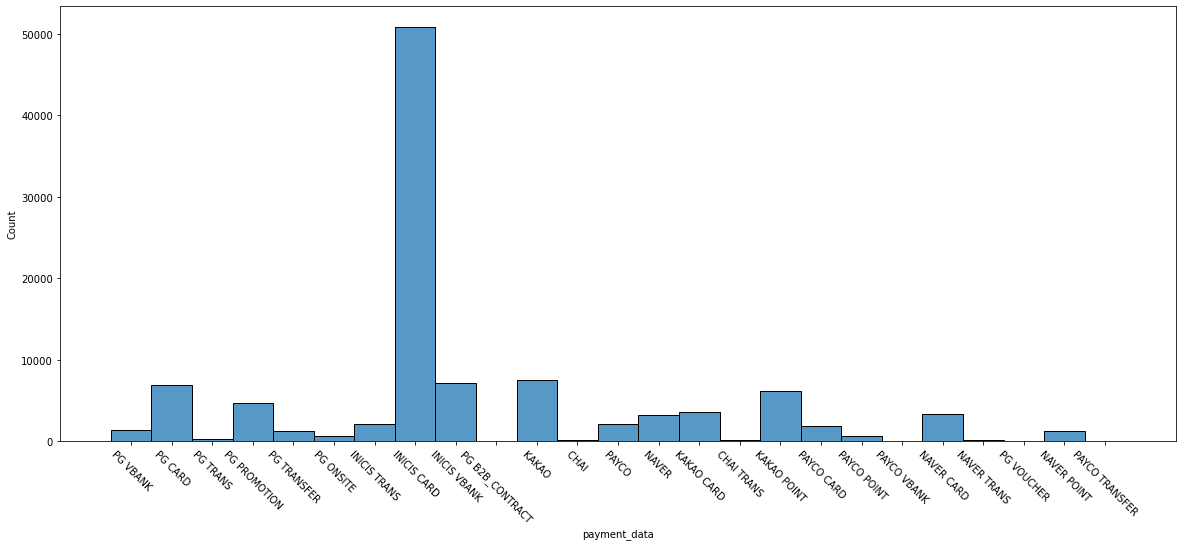

In [16]:
plt.figure(figsize=(20,8))
sns.histplot(data= payment_data,  x='payment_data')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

In [17]:
course_title = {
    'course_title' : np.count_nonzero
}
df.groupby(['category_title','subcategory_title']).agg(course_title)

course_title
category_title subcategory_title              
데이터사이언스        데이터분석                      4302
               데이터엔지니어링                    275
               딥러닝/인공지능                   4590
               머신러닝                       1958
디자인            UX/UI                      2775
               디자인툴                       4053
               시각디자인                      1927
               일러스트                       3238
마케팅            SNS마케팅                     1190
               글쓰기/카피라이팅                  3524
               데이터마케팅                     2306
               디지털마케팅                     1754
부동산/금융         금융/투자 실무                   2075
               부동산 개발                     1179
               회계/재무/세무                   1948
업무 생산성         PPT/보고서                    4150
               리더십                         511
               업무자동화                       996
               엑셀/VBA                     3591
               커뮤니케이션                      204
영상/3D          VFX                         523
               게임 그래픽                      385
               모션그래픽                      2033
               영상 편집                      7312
투자/재테크         부동산 투자                      714
               주식 투자                      1787
프로그래밍          DevOps                     2136
               개발자 커리어                    5918
               게임                         1707
               모바일앱                       3724
               백엔드 개발                     6144
               코딩 입문                       782
               프론트엔드 개발                   5879

In [18]:
payment_data.groupby(['category_title', 'subcategory_title','course_title']).count()

id  \
category_title subcategory_title course_title                                               
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                      37   
                                 The RED : 데이터 사이언티스트 하용호                             152   
                                 글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)                61   
                                 올인원 패키지 : 직장인을 위한 파이썬 데이터분석                          892   
                                 올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP                  201   
...                                                                                   ...   
프로그래밍          프론트엔드 개발          올인원 패키지 : TypeScript & Angular 실전                     95   
                                 올인원 패키지 : Vue.js 압축 완성                               190   
                                 올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T...  1435   
                                 초격차 패키지 : 한 번에 끝내는 React의 모든 것                       393   
                                 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                         3257   

                                                                                     customer_id  \
category_title subcategory_title course_title                                                      
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                             37   
                                 The RED : 데이터 사이언티스트 하용호                                    152   
                                 글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)                       61   
                                 올인원 패키지 : 직장인을 위한 파이썬 데이터분석                                 892   
                                 올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP                         201   
...                                                                                          ...   
프로그래밍          프론트엔드 개발          올인원 패키지 : TypeScript & Angular 실전                            95   
                                 올인원 패키지 : Vue.js 압축 완성                                      190   
                                 올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T...         1435   
                                 초격차 패키지 : 한 번에 끝내는 React의 모든 것                              393   
                                 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                                3257   

                                                                                     course_id  \
category_title subcategory_title course_title                                                    
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                           37   
                                 The RED : 데이터 사이언티스트 하용호                                  152   
                                 글로벌 엑스퍼트 : 바이오 데이터사이언스(Bioinformatics)                     61   
                                 올인원 패키지 : 직장인을 위한 파이썬 데이터분석                               892   
                                 올인원 패키지 : 파이썬을 활용한 데이터 전처리 Level UP                       201   
...                                                                                        ...   
프로그래밍          프론트엔드 개발          올인원 패키지 : TypeScript & Angular 실전                          95   
                                 올인원 패키지 : Vue.js 압축 완성                                    190   
                                 올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & T...       1435   
                                 초격차 패키지 : 한 번에 끝내는 React의 모든 것                            393   
                                 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                              3257   

                                                                                     type  \
category_title subcategory_title course_title                                               
데이터사이언스        데이터분석             Apache Spark을 이용한 빅데이터 분석 입문 15기                      37   
                      

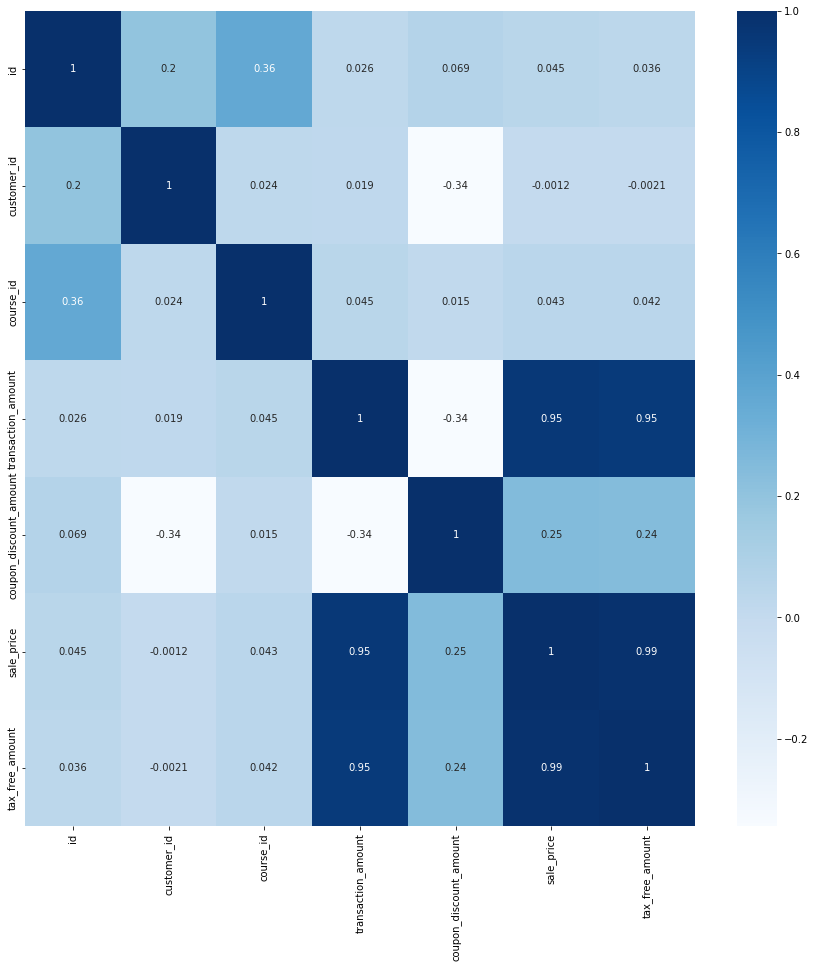

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(data = df.corr(), cmap='Blues', annot=True)
plt.show()

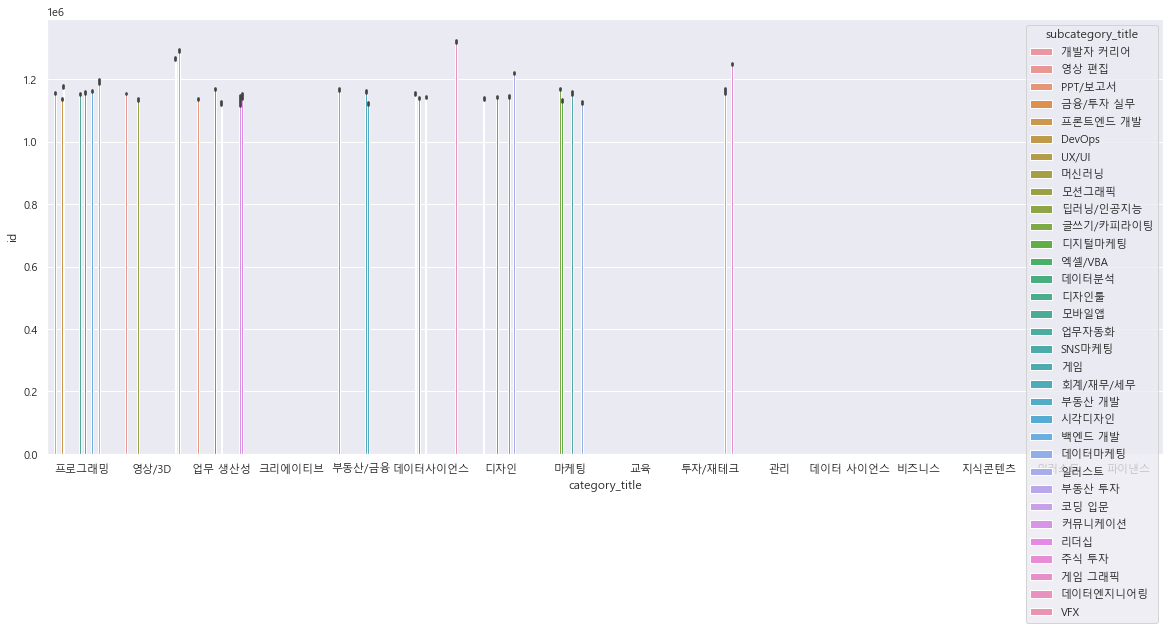

In [23]:
plt.figure(figsize=(20,8))
sns.barplot(data=df, x='category_title', y='id', hue='subcategory_title')
plt.show()

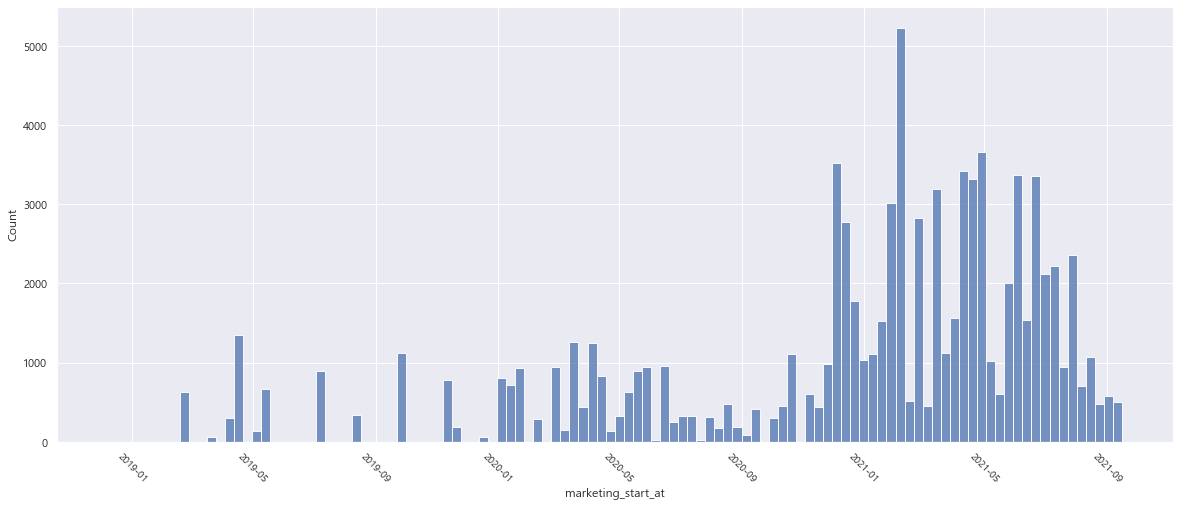

In [24]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='marketing_start_at')
plt.xticks(rotation=-45, fontsize=10)
plt.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

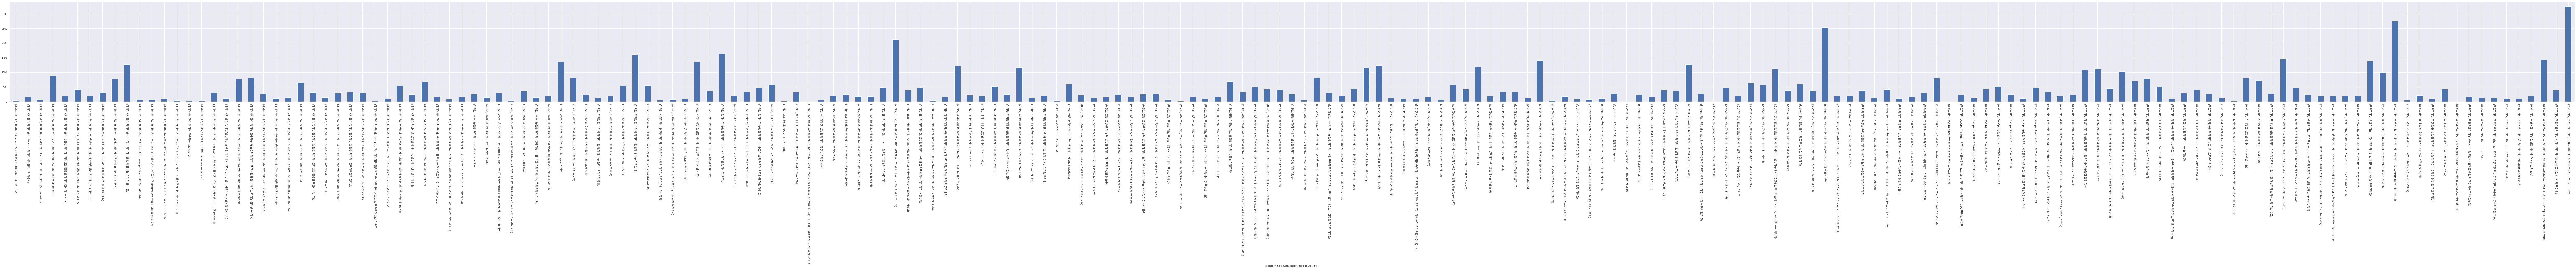

In [25]:
plt.figure(figsize=(200,8))
payment_data.groupby(['category_title', 'subcategory_title','course_title'])['id'].count().plot(kind='bar')
plt.xticks(rotation=-90)

In [31]:
how = {
    'id' : np.count_nonzero,
    'sale_price' : np.sum
}

df.groupby(['type','state']).agg(how)

id   sale_price
type        state                        
ORDER       CANCELLED  34123 5361068985.0
            COMPLETED   6036  959976000.0
PAYMENT     CANCELLED   7156 1538631800.0
            COMPLETED  52902 7990680312.0
            DELETED      217   28139000.0
            PENDING     1144  190357960.0
            REQUESTED     14    2291500.0
REFUND      COMPLETED   3822  728028560.0
            DELETED        2     103000.0
TRANSACTION COMPLETED      3          0.0

In [36]:
how2 = {
    'id' : np.count_nonzero,
    'transaction_amount' : np.sum
}

df.groupby(['type','state']).agg(how2)

id  transaction_amount
type        state                               
ORDER       CANCELLED  34123        4841461868.0
            COMPLETED   6036         932961850.0
PAYMENT     CANCELLED   7156        1416919450.0
            COMPLETED  52902        8642456412.0
            DELETED      217          57635600.0
            PENDING     1144         179941980.0
            REQUESTED     14           2073700.0
REFUND      COMPLETED   3822        -629922955.0
            DELETED        2          -1603000.0
TRANSACTION COMPLETED      3                 0.0

In [47]:
how3 = {
    'category_title' : np.count_nonzero,
     'coupon_discount_amount' : np.count_nonzero
}

df3 = df.groupby(['type','state']).agg(how3)
df.groupby(['type','state']).agg(how3)

category_title  coupon_discount_amount
type        state                                            
ORDER       CANCELLED           34123                   34122
            COMPLETED            6036                    6036
PAYMENT     CANCELLED            7156                    7156
            COMPLETED           52902                   52902
            DELETED               217                     217
            PENDING              1144                    1144
            REQUESTED              14                      14
REFUND      COMPLETED            3822                    3822
            DELETED                 2                       2
TRANSACTION COMPLETED               3                       3

In [50]:
df['category_title'].unique() # 16



array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [64]:
#df[df.type == 'refund'].format.value_counts()

Series([], Name: format, dtype: int64)

In [59]:
df3.iloc[3,1] 

52902

In [65]:
how = {
    'transaction_amount' : np.sum,
}
payment_data.groupby(['category_title','state']).agg(how)

transaction_amount
category_title state                        
관리             CANCELLED            150000.0
               COMPLETED            150000.0
교육             CANCELLED          96107045.0
               COMPLETED        1160775545.0
               DELETED            19852500.0
데이터 사이언스       CANCELLED           1556000.0
               COMPLETED           1550000.0
데이터사이언스        CANCELLED        1107113125.0
               COMPLETED        1660328649.0
               DELETED             4040700.0
               PENDING            26399750.0
               REQUESTED            456000.0
디자인            CANCELLED         667121410.0
               COMPLETED         777925268.0
               DELETED             2997200.0
               PENDING            24017950.0
마케팅            CANCELLED         597333620.0
               COMPLETED         868305624.0
               DELETED             3617800.0
               PENDING            24529750.0
               REQUESTED            471200.0
부동산/금융         CANCELLED         397011775.0
               COMPLETED         538303534.0
               DELETED             1398000.0
               PENDING             9875800.0
               REQUESTED            101000.0
비즈니스           CANCELLED           6124355.0
               COMPLETED           5389865.0
업무 생산성         CANCELLED         524203465.0
               COMPLETED         663920925.0
               DELETED             2785900.0
               PENDING            19338065.0
               REQUESTED            206500.0
영상/3D          CANCELLED         463843275.0
               COMPLETED         616108205.0
               DELETED             3218600.0
               PENDING            14452000.0
               REQUESTED            269500.0
일러스트           CANCELLED            208000.0
지식콘텐츠          CANCELLED           4710000.0
               COMPLETED           7360000.0
               PENDING              707000.0
크리에이티브         CANCELLED         472480400.0
               COMPLETED         341440827.0
               DELETED             4037000.0
               PENDING            11986300.0
               REQUESTED            199000.0
투자/재테크         CANCELLED         154778425.0
               COMPLETED         316888820.0
               DELETED             1177000.0
               PENDING             6770500.0
파이낸스           CANCELLED           1980000.0
               COMPLETED           5100000.0
프로그래밍          CANCELLED        1757270423.0
               COMPLETED        1968677045.0
               DELETED             7736400.0
               PENDING            41864865.0
               REQUESTED            370500.0

In [66]:
how = {
    'customer_id' : np.count_nonzero
}

df.groupby(['format']).agg(how)

,customer_id
format,
B2B,808
B2B 온라인,1086
B2G,592
MBA,56
RED,6253
관리,2
스쿨,1036
스쿨 온라인,1057
아카이브,72


In [71]:
df1= df.drop(df.loc[df['state'] != 'COMPLETED'].index)
df1.groupby(['type', 'state','category_title','subcategory_title']).agg(how)

customer_id
type    state     category_title subcategory_title             
ORDER   COMPLETED 데이터사이언스        데이터분석                      326
                                 데이터엔지니어링                     8
                                 딥러닝/인공지능                   261
                                 머신러닝                       155
                  디자인            UX/UI                      160
                                 디자인툴                       255
                                 시각디자인                       74
                                 일러스트                       279
                  마케팅            SNS마케팅                      56
                                 글쓰기/카피라이팅                  551
                                 데이터마케팅                     122
                                 디지털마케팅                     104
                  부동산/금융         금융/투자 실무                    92
                                 부동산 개발                      52
                                 회계/재무/세무                   137
                  업무 생산성         PPT/보고서                    247
                                 리더십                         30
                                 업무자동화                       33
                                 엑셀/VBA                     180
                                 커뮤니케이션                       5
                  영상/3D          VFX                         29
                                 게임 그래픽                      40
                                 모션그래픽                      107
                                 영상 편집                      405
                  투자/재테크         부동산 투자                      15
                                 주식 투자                      123
                  프로그래밍          DevOps                     109
                                 개발자 커리어                    361
                                 게임                         107
                                 모바일앱                       262
                                 백엔드 개발                     370
                                 코딩 입문                       30
                                 프론트엔드 개발                   299
PAYMENT COMPLETED 데이터사이언스        데이터분석                     2098
                                 데이터엔지니어링                   178
                                 딥러닝/인공지능                  2314
                                 머신러닝                      1060
                  디자인            UX/UI                     1309
                                 디자인툴                      1902
                                 시각디자인                      950
                                 일러스트                      1548
                  마케팅            SNS마케팅                     654
                                 글쓰기/카피라이팅                 1703
                                 데이터마케팅                    1090
                                 디지털마케팅                     850
                  부동산/금융         금융/투자 실무                  1134
                                 부동산 개발                     591
                                 회계/재무/세무                  1000
                  업무 생산성         PPT/보고서                   2061
                                 리더십                        284
                                 업무자동화                      487
                                 엑셀/VBA                    1978
                                 커뮤니케이션                     117
                  영상/3D          VFX                        351
                                 게임 그래픽                     222
                                 모션그래픽                      953
                                 영상 편집                     3625
                  투자/재테크         부동산 투자                     384
                                 주식 투자                     1106
                  프로그래밍          DevOps                    1211
                                 개발자 커리어                   3104
                    

In [88]:
# format에서 올인원의 환불률
# 올인원 DF
cond_allinone = df['format'] == '올인원'
cond_payment = df['type'] == 'PAYMENT'
cond_refund = df['type'] == 'REFUND'

# 올인원에서 결제승인
df[cond_allinone][cond_payment]
# 올인원에서 환불승인
df[cond_allinone][cond_refund]

# len(df.index)

# 올인원 결제승인 갯수 = 전체 갯수
all_payment = len(df[cond_allinone][cond_payment].index)

# 올인원 환불승인 갯수
all_refund = len(df[cond_allinone][cond_refund].index)


# 올인원 환불률
refund_ratio = all_refund / all_payment * 100

refund_ratio

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/1596384045.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond_allinone][cond_payment]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/1596384045.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond_allinone][cond_refund]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/1596384045.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_payment = len(df[cond_allinone][cond_payment].index)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/1596384045.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_refund = len(df[cond_allinone][cond_refund].index)


7.052166712669059

In [89]:
# 환불이 승인된 데이터프레임
cond_refund = (df['type']== 'REFUND') & (df['state'] == 'COMPLETED')
df[cond_refund]

# 결제가 승인된 데이터 프레임
cond_payment = (df['type']== 'PAYMENT') & (df['state'] == 'COMPLETED')
df[cond_payment]

# 결측치 처리 (결측치 1개 존재 : 강의 타이틀에 프로모션이 존재해서 프로모션으로 정함)
df[df['format'].isna()] = '프로모션'

In [90]:
# format array화
format_array = df['format'].unique()

for i in format_array:
    cond = (df['format'] == i)
    # 결제승인
    df[cond][cond_payment]
    # 환불승인
    df[cond][cond_refund]
    # 결제승인 갯수 = 전체 갯수
    payment = len(df[cond][cond_payment].index)
    # 환불승인 갯수
    refund = len(df[cond][cond_refund].index)
    if refund != 0 and payment != 0:
        refund_ratio = refund / payment * 100
    elif payment == 0:
        refund_ratio = 0
        print(f'{i}의 payment가 0')
    else:
        refund_ratio = 0
        print(f'{i}의 refund가 0')
    refund_ratio = round(refund_ratio, 3)
    print(f'format : "{i}"의 환불률은 {refund_ratio}% 입니다.')

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/3360776054.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond][cond_payment]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/3360776054.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[cond][cond_refund]
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/3360776054.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  payment = len(df[cond][cond_payment].index)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_29488/3360776054.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  refund = len(df[cond][cond_refund].index)


format : "스쿨 온라인"의 환불률은 6.811% 입니다.
format : "올인원"의 환불률은 7.052% 입니다.
format : "RED"의 환불률은 5.226% 입니다.
format : "온라인 완주반"의 환불률은 22.597% 입니다.
format : "B2B 온라인"의 환불률은 0.716% 입니다.
format : "캠프"의 환불률은 19.048% 입니다.
format : "스쿨"의 환불률은 0.975% 입니다.
format : "B2B"의 환불률은 22.475% 입니다.
format : "이벤트"의 환불률은 8.537% 입니다.
format : "하루10분컷"의 환불률은 2.39% 입니다.
format : "아카이브"의 환불률은 12.903% 입니다.
관리의 refund가 0
format : "관리"의 환불률은 0% 입니다.
온라인의 payment가 0
format : "온라인"의 환불률은 0% 입니다.
프로모션의 refund가 0
format : "프로모션"의 환불률은 0% 입니다.
MBA의 refund가 0
format : "MBA"의 환불률은 0% 입니다.
format : "B2G"의 환불률은 24.355% 입니다.


In [96]:
cond = df[df['format']=='프로모션'].index
df = df.drop(cond)

how = {
    'transaction_amount' : np.sum
}
df.groupby(['format', 'type']).agg(how)

transaction_amount
format  type                       
B2B     PAYMENT           755932780
        REFUND             -3204990
B2B 온라인 PAYMENT          1232648319
        REFUND             -3880000
B2G     PAYMENT            31846300
        REFUND             -2925000
MBA     PAYMENT             4970000
RED     PAYMENT           509463500
        REFUND            -28031137
관리      PAYMENT              150000
스쿨      PAYMENT            14608693
        REFUND            -15894039
스쿨 온라인  PAYMENT            42034660
        REFUND             -3505528
아카이브    PAYMENT             2181900
        REFUND              -286200
온라인     REFUND              -199000
온라인 완주반 PAYMENT           532540500
        REFUND           -115675640
올인원     PAYMENT          5449410010
        REFUND           -450347477
이벤트     PAYMENT             4844000
        REFUND              -446000
캠프      PAYMENT            23974000
        REFUND             -4902500
하루10분컷  PAYMENT            27351750
        REFUND              -625444

<AxesSubplot:xlabel='format,type'>

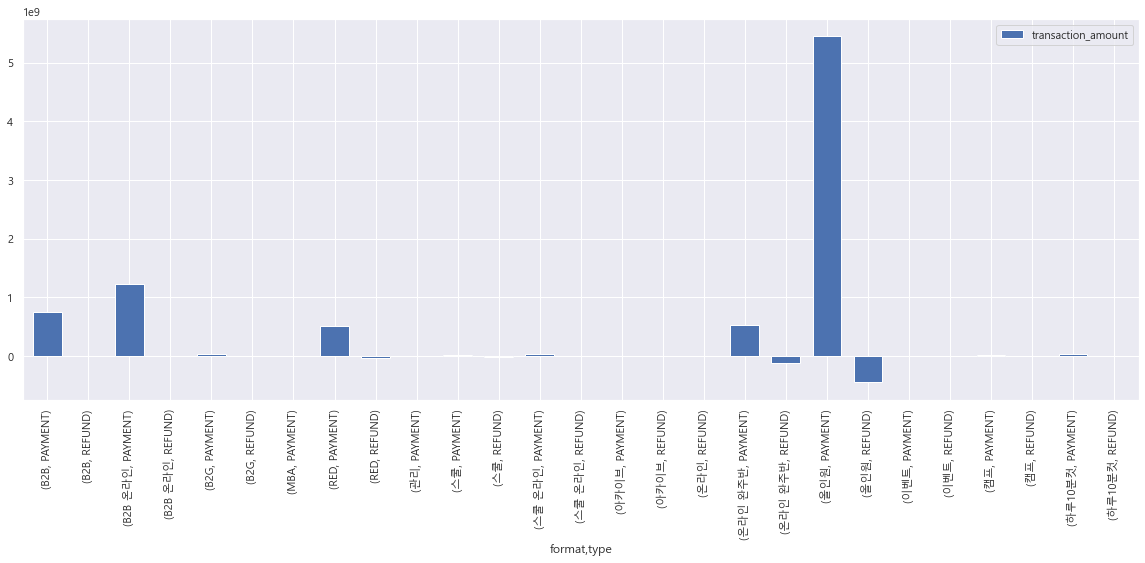

In [126]:
s = df.groupby(['format', 'type']).agg(how)

s.plot(kind='bar',width=0.7, figsize=(20,7))


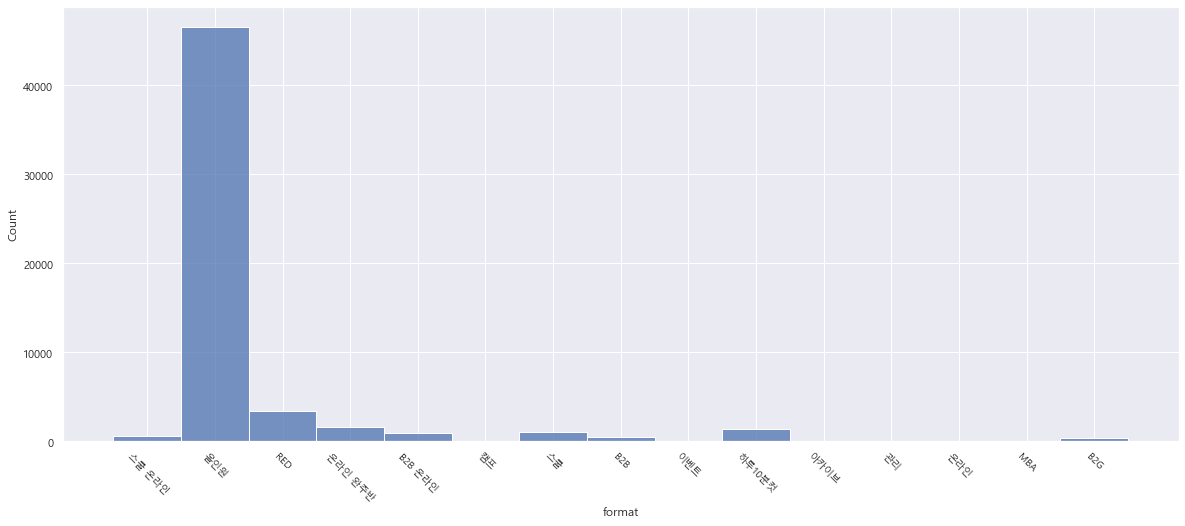

In [97]:
plt.figure(figsize=(20,8))
sns.histplot(data= df,  x='format')
plt.xticks(rotation=-45, fontsize=10)
plt.show()